In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
print(tf.__version__)
import matplotlib.pyplot as plt
import random

2.6.0


In [2]:
dft= pd.read_csv('Corécupjupy.csv', sep=';')
del dft[dft.columns[0]]
del dft[dft.columns[147]]
dft=pd.DataFrame.to_numpy(dft)
dft=np.nan_to_num(dft)
dft=dft.astype(int)
x, y = dft[:, [0, 1]], dft[:, [2,3]]

In [3]:
y=np.nan_to_num(y)
x=np.nan_to_num(x)

In [4]:
c1=2
c2=3
t1=2
t2=12
ytrain = dft[:, [c1,c2]]
ytrain, yval, ytest=np.split((ytrain), [int(0.8*len(ytrain)), int(0.9*len(ytrain))])
ytest= dft[0:60][:, t1:t2]
print(len(yval))
print(len(ytrain))
print(len(ytest))


59
475
60


In [5]:
train, val, test=np.split((x), [int(0.8*len(x)), int(0.9*len(x))])

In [6]:
test=dft[0:475][:, 0:12]

In [7]:
print(len(train))
print(len(val))
print(len(test))

475
59
475


In [8]:
change=2
predictionstot=np.zeros((475,2))

In [9]:
for x in range(5):
    input1 = tf.keras.Input(shape=(2,))
    l1 = tf.keras.layers.Dense(10, activation='sigmoid')(input1)
    l2=tf.keras.layers.Dense(10, activation='sigmoid')(l1)
    l3=tf.keras.layers.Dense(10, activation='sigmoid')(l2)
    l4=tf.keras.layers.Dense(5, activation='relu')(l3)
    out1 = tf.keras.layers.Dense(2)(l4)
    model = tf.keras.Model(inputs=input1, outputs=out1)
    opt = keras.optimizers.Adam(learning_rate=0.0001, clipnorm=1.0)
    model.compile( loss='mean_squared_logarithmic_error', optimizer=opt, metrics=["MSE"])
    model.fit(train, ytrain, epochs=1000, batch_size=2, verbose=2)
    predictions1=model.predict(train)
    variation=random.randint(1, 10)
    predictions1=np.multiply(predictions1, variation)
    train=np.append(train, predictions1, axis=1)
    train=np.delete(train, 0, axis=1)
    train=np.delete(train, 0, axis=1)
    predictionstot=np.append(predictionstot, predictions1, axis=1)
    c1+=1
    c2+=1
    ytrain = dft[0:475][:, [c1,c2]]

Epoch 1/1000
238/238 - 1s - loss: 36.4371 - MSE: 553767.1250
Epoch 2/1000
238/238 - 0s - loss: 35.5704 - MSE: 553613.5000
Epoch 3/1000
238/238 - 0s - loss: 34.7829 - MSE: 553487.8125
Epoch 4/1000
238/238 - 0s - loss: 34.0533 - MSE: 553406.4375
Epoch 5/1000
238/238 - 0s - loss: 33.3460 - MSE: 553308.9375
Epoch 6/1000
238/238 - 0s - loss: 32.6683 - MSE: 553194.6875
Epoch 7/1000
238/238 - 0s - loss: 32.0359 - MSE: 553065.0000
Epoch 8/1000
238/238 - 0s - loss: 31.4526 - MSE: 552919.0000
Epoch 9/1000
238/238 - 0s - loss: 30.9146 - MSE: 552753.6875
Epoch 10/1000
238/238 - 0s - loss: 30.4215 - MSE: 552570.3125
Epoch 11/1000
238/238 - 0s - loss: 29.9683 - MSE: 552375.0000
Epoch 12/1000
238/238 - 0s - loss: 29.5429 - MSE: 552158.8125
Epoch 13/1000
238/238 - 0s - loss: 29.1456 - MSE: 551929.1250
Epoch 14/1000
238/238 - 0s - loss: 28.7705 - MSE: 551686.6250
Epoch 15/1000
238/238 - 0s - loss: 28.4146 - MSE: 551421.0625
Epoch 16/1000
238/238 - 0s - loss: 28.0814 - MSE: 551150.5625
Epoch 17/1000
238

Epoch 133/1000
238/238 - 0s - loss: 20.2968 - MSE: 470768.2500
Epoch 134/1000
238/238 - 0s - loss: 20.2880 - MSE: 470001.9688
Epoch 135/1000
238/238 - 0s - loss: 20.2794 - MSE: 469238.6562
Epoch 136/1000
238/238 - 0s - loss: 20.2710 - MSE: 468462.4688
Epoch 137/1000
238/238 - 0s - loss: 20.2628 - MSE: 467695.1250
Epoch 138/1000
238/238 - 0s - loss: 20.2547 - MSE: 466939.7188
Epoch 139/1000
238/238 - 0s - loss: 20.2469 - MSE: 466171.3750
Epoch 140/1000
238/238 - 0s - loss: 20.2392 - MSE: 465418.4375
Epoch 141/1000
238/238 - 0s - loss: 20.2318 - MSE: 464695.8125
Epoch 142/1000
238/238 - 0s - loss: 20.2247 - MSE: 463962.0000
Epoch 143/1000
238/238 - 0s - loss: 20.2177 - MSE: 463231.2188
Epoch 144/1000
238/238 - 0s - loss: 20.2108 - MSE: 462506.7500
Epoch 145/1000
238/238 - 0s - loss: 20.2042 - MSE: 461815.0938
Epoch 146/1000
238/238 - 0s - loss: 20.1977 - MSE: 461090.0938
Epoch 147/1000
238/238 - 0s - loss: 20.1914 - MSE: 460382.4375
Epoch 148/1000
238/238 - 0s - loss: 20.1852 - MSE: 4596

238/238 - 0s - loss: 19.9597 - MSE: 415994.5312
Epoch 264/1000
238/238 - 0s - loss: 19.9589 - MSE: 415874.0625
Epoch 265/1000
238/238 - 0s - loss: 19.9581 - MSE: 415686.1562
Epoch 266/1000
238/238 - 0s - loss: 19.9573 - MSE: 415558.8125
Epoch 267/1000
238/238 - 0s - loss: 19.9564 - MSE: 415346.4688
Epoch 268/1000
238/238 - 0s - loss: 19.9557 - MSE: 415250.0625
Epoch 269/1000
238/238 - 0s - loss: 19.9548 - MSE: 415077.2500
Epoch 270/1000
238/238 - 0s - loss: 19.9538 - MSE: 414848.4062
Epoch 271/1000
238/238 - 0s - loss: 19.9533 - MSE: 414817.5938
Epoch 272/1000
238/238 - 0s - loss: 19.9523 - MSE: 414649.9062
Epoch 273/1000
238/238 - 0s - loss: 19.9514 - MSE: 414454.8438
Epoch 274/1000
238/238 - 0s - loss: 19.9506 - MSE: 414344.2812
Epoch 275/1000
238/238 - 0s - loss: 19.9497 - MSE: 414200.7188
Epoch 276/1000
238/238 - 0s - loss: 19.9491 - MSE: 414089.2812
Epoch 277/1000
238/238 - 0s - loss: 19.9480 - MSE: 413884.3750
Epoch 278/1000
238/238 - 0s - loss: 19.9473 - MSE: 413801.5625
Epoch 2

Epoch 394/1000
238/238 - 0s - loss: 19.9032 - MSE: 407815.6875
Epoch 395/1000
238/238 - 0s - loss: 19.8967 - MSE: 407010.0625
Epoch 396/1000
238/238 - 0s - loss: 19.8938 - MSE: 406415.9688
Epoch 397/1000
238/238 - 0s - loss: 19.8925 - MSE: 406123.1250
Epoch 398/1000
238/238 - 0s - loss: 19.8927 - MSE: 406090.6875
Epoch 399/1000
238/238 - 0s - loss: 19.8938 - MSE: 406252.2500
Epoch 400/1000
238/238 - 0s - loss: 19.8922 - MSE: 405950.1562
Epoch 401/1000
238/238 - 0s - loss: 19.8903 - MSE: 405773.5000
Epoch 402/1000
238/238 - 0s - loss: 19.8938 - MSE: 406028.4688
Epoch 403/1000
238/238 - 0s - loss: 19.8919 - MSE: 405796.5000
Epoch 404/1000
238/238 - 0s - loss: 19.8944 - MSE: 406282.3750
Epoch 405/1000
238/238 - 0s - loss: 19.8934 - MSE: 406029.6875
Epoch 406/1000
238/238 - 0s - loss: 19.8940 - MSE: 406005.9062
Epoch 407/1000
238/238 - 0s - loss: 19.8947 - MSE: 406020.8438
Epoch 408/1000
238/238 - 0s - loss: 19.8916 - MSE: 405546.2812
Epoch 409/1000
238/238 - 0s - loss: 19.8906 - MSE: 4053

238/238 - 0s - loss: 19.7578 - MSE: 387369.9375
Epoch 525/1000
238/238 - 0s - loss: 19.7596 - MSE: 387427.1250
Epoch 526/1000
238/238 - 0s - loss: 19.7551 - MSE: 386743.7812
Epoch 527/1000
238/238 - 0s - loss: 19.7506 - MSE: 386486.8438
Epoch 528/1000
238/238 - 0s - loss: 19.7483 - MSE: 385862.1250
Epoch 529/1000
238/238 - 0s - loss: 19.7451 - MSE: 385394.7500
Epoch 530/1000
238/238 - 0s - loss: 19.7448 - MSE: 385437.2812
Epoch 531/1000
238/238 - 0s - loss: 19.7453 - MSE: 385758.4375
Epoch 532/1000
238/238 - 0s - loss: 19.7458 - MSE: 385748.9062
Epoch 533/1000
238/238 - 0s - loss: 19.7401 - MSE: 384961.2812
Epoch 534/1000
238/238 - 0s - loss: 19.7367 - MSE: 384902.3750
Epoch 535/1000
238/238 - 0s - loss: 19.7349 - MSE: 384451.9062
Epoch 536/1000
238/238 - 0s - loss: 19.7333 - MSE: 384221.3750
Epoch 537/1000
238/238 - 0s - loss: 19.7352 - MSE: 384452.6250
Epoch 538/1000
238/238 - 0s - loss: 19.7337 - MSE: 384337.2500
Epoch 539/1000
238/238 - 0s - loss: 19.7284 - MSE: 383383.9375
Epoch 5

Epoch 655/1000
238/238 - 0s - loss: 19.6225 - MSE: 364495.2188
Epoch 656/1000
238/238 - 0s - loss: 19.6244 - MSE: 364554.0938
Epoch 657/1000
238/238 - 0s - loss: 19.6216 - MSE: 364176.1875
Epoch 658/1000
238/238 - 0s - loss: 19.6197 - MSE: 364184.4688
Epoch 659/1000
238/238 - 0s - loss: 19.6220 - MSE: 364156.2812
Epoch 660/1000
238/238 - 0s - loss: 19.6216 - MSE: 363984.9062
Epoch 661/1000
238/238 - 0s - loss: 19.6228 - MSE: 363811.5938
Epoch 662/1000
238/238 - 0s - loss: 19.6221 - MSE: 363725.8438
Epoch 663/1000
238/238 - 0s - loss: 19.6206 - MSE: 363428.4688
Epoch 664/1000
238/238 - 0s - loss: 19.6179 - MSE: 363835.4375
Epoch 665/1000
238/238 - 0s - loss: 19.6158 - MSE: 363668.5625
Epoch 666/1000
238/238 - 0s - loss: 19.6142 - MSE: 363410.4062
Epoch 667/1000
238/238 - 0s - loss: 19.6160 - MSE: 363369.0000
Epoch 668/1000
238/238 - 0s - loss: 19.6152 - MSE: 363260.9688
Epoch 669/1000
238/238 - 0s - loss: 19.6196 - MSE: 363259.0938
Epoch 670/1000
238/238 - 0s - loss: 19.6129 - MSE: 3632

238/238 - 0s - loss: 19.5767 - MSE: 358800.5938
Epoch 786/1000
238/238 - 0s - loss: 19.5785 - MSE: 359023.8125
Epoch 787/1000
238/238 - 0s - loss: 19.5740 - MSE: 358742.3750
Epoch 788/1000
238/238 - 0s - loss: 19.5771 - MSE: 358791.9062
Epoch 789/1000
238/238 - 0s - loss: 19.5779 - MSE: 358566.5312
Epoch 790/1000
238/238 - 0s - loss: 19.5756 - MSE: 358342.5938
Epoch 791/1000
238/238 - 0s - loss: 19.5742 - MSE: 358322.2812
Epoch 792/1000
238/238 - 0s - loss: 19.5763 - MSE: 358317.9375
Epoch 793/1000
238/238 - 0s - loss: 19.5780 - MSE: 358506.9688
Epoch 794/1000
238/238 - 0s - loss: 19.5761 - MSE: 358401.9688
Epoch 795/1000
238/238 - 0s - loss: 19.5743 - MSE: 358282.6562
Epoch 796/1000
238/238 - 0s - loss: 19.5735 - MSE: 358288.0938
Epoch 797/1000
238/238 - 0s - loss: 19.5728 - MSE: 358126.4062
Epoch 798/1000
238/238 - 0s - loss: 19.5753 - MSE: 358344.8125
Epoch 799/1000
238/238 - 0s - loss: 19.5752 - MSE: 358078.0312
Epoch 800/1000
238/238 - 0s - loss: 19.5734 - MSE: 358046.8438
Epoch 8

Epoch 916/1000
238/238 - 0s - loss: 19.5540 - MSE: 350742.8125
Epoch 917/1000
238/238 - 0s - loss: 19.5531 - MSE: 350768.3125
Epoch 918/1000
238/238 - 0s - loss: 19.5525 - MSE: 350469.3125
Epoch 919/1000
238/238 - 0s - loss: 19.5537 - MSE: 350497.7812
Epoch 920/1000
238/238 - 0s - loss: 19.5538 - MSE: 350625.2812
Epoch 921/1000
238/238 - 0s - loss: 19.5534 - MSE: 350641.8750
Epoch 922/1000
238/238 - 0s - loss: 19.5539 - MSE: 350681.1562
Epoch 923/1000
238/238 - 0s - loss: 19.5523 - MSE: 350458.9688
Epoch 924/1000
238/238 - 0s - loss: 19.5524 - MSE: 350449.7500
Epoch 925/1000
238/238 - 0s - loss: 19.5531 - MSE: 350344.6875
Epoch 926/1000
238/238 - 0s - loss: 19.5513 - MSE: 350112.8438
Epoch 927/1000
238/238 - 0s - loss: 19.5541 - MSE: 350366.3125
Epoch 928/1000
238/238 - 0s - loss: 19.5523 - MSE: 350179.3750
Epoch 929/1000
238/238 - 0s - loss: 19.5508 - MSE: 349977.4375
Epoch 930/1000
238/238 - 0s - loss: 19.5518 - MSE: 350150.6250
Epoch 931/1000
238/238 - 0s - loss: 19.5520 - MSE: 3499

Epoch 47/1000
238/238 - 0s - loss: 24.1294 - MSE: 478590.9688
Epoch 48/1000
238/238 - 0s - loss: 24.0302 - MSE: 478312.3750
Epoch 49/1000
238/238 - 0s - loss: 23.9332 - MSE: 478023.4688
Epoch 50/1000
238/238 - 0s - loss: 23.8374 - MSE: 477724.7812
Epoch 51/1000
238/238 - 0s - loss: 23.7427 - MSE: 477420.3438
Epoch 52/1000
238/238 - 0s - loss: 23.6480 - MSE: 477097.9062
Epoch 53/1000
238/238 - 0s - loss: 23.5561 - MSE: 476773.0938
Epoch 54/1000
238/238 - 0s - loss: 23.4669 - MSE: 476451.3438
Epoch 55/1000
238/238 - 0s - loss: 23.3802 - MSE: 476107.2188
Epoch 56/1000
238/238 - 0s - loss: 23.2975 - MSE: 475772.9062
Epoch 57/1000
238/238 - 0s - loss: 23.2177 - MSE: 475428.9062
Epoch 58/1000
238/238 - 0s - loss: 23.1414 - MSE: 475101.4062
Epoch 59/1000
238/238 - 0s - loss: 23.0672 - MSE: 474758.4375
Epoch 60/1000
238/238 - 0s - loss: 22.9953 - MSE: 474408.2188
Epoch 61/1000
238/238 - 0s - loss: 22.9259 - MSE: 474061.8438
Epoch 62/1000
238/238 - 0s - loss: 22.8586 - MSE: 473711.4688
Epoch 63

Epoch 178/1000
238/238 - 0s - loss: 20.0830 - MSE: 420953.5625
Epoch 179/1000
238/238 - 0s - loss: 20.0766 - MSE: 420505.4688
Epoch 180/1000
238/238 - 0s - loss: 20.0704 - MSE: 420075.8125
Epoch 181/1000
238/238 - 0s - loss: 20.0643 - MSE: 419624.5000
Epoch 182/1000
238/238 - 0s - loss: 20.0583 - MSE: 419188.7812
Epoch 183/1000
238/238 - 0s - loss: 20.0524 - MSE: 418755.4688
Epoch 184/1000
238/238 - 0s - loss: 20.0466 - MSE: 418310.1562
Epoch 185/1000
238/238 - 0s - loss: 20.0409 - MSE: 417874.4062
Epoch 186/1000
238/238 - 0s - loss: 20.0354 - MSE: 417453.4688
Epoch 187/1000
238/238 - 0s - loss: 20.0300 - MSE: 417021.0938
Epoch 188/1000
238/238 - 0s - loss: 20.0247 - MSE: 416607.0000
Epoch 189/1000
238/238 - 0s - loss: 20.0195 - MSE: 416176.9375
Epoch 190/1000
238/238 - 0s - loss: 20.0144 - MSE: 415757.3125
Epoch 191/1000
238/238 - 0s - loss: 20.0094 - MSE: 415340.8438
Epoch 192/1000
238/238 - 0s - loss: 20.0045 - MSE: 414927.4062
Epoch 193/1000
238/238 - 0s - loss: 19.9996 - MSE: 4145

238/238 - 0s - loss: 19.7779 - MSE: 383012.0625
Epoch 309/1000
238/238 - 0s - loss: 19.7774 - MSE: 382875.3438
Epoch 310/1000
238/238 - 0s - loss: 19.7769 - MSE: 382718.7500
Epoch 311/1000
238/238 - 0s - loss: 19.7764 - MSE: 382565.5000
Epoch 312/1000
238/238 - 0s - loss: 19.7759 - MSE: 382409.4688
Epoch 313/1000
238/238 - 0s - loss: 19.7754 - MSE: 382253.6875
Epoch 314/1000
238/238 - 0s - loss: 19.7749 - MSE: 382104.5000
Epoch 315/1000
238/238 - 0s - loss: 19.7744 - MSE: 381975.1562
Epoch 316/1000
238/238 - 0s - loss: 19.7740 - MSE: 381824.6875
Epoch 317/1000
238/238 - 0s - loss: 19.7736 - MSE: 381687.0312
Epoch 318/1000
238/238 - 0s - loss: 19.7731 - MSE: 381533.7500
Epoch 319/1000
238/238 - 0s - loss: 19.7727 - MSE: 381416.2500
Epoch 320/1000
238/238 - 0s - loss: 19.7723 - MSE: 381247.3125
Epoch 321/1000
238/238 - 0s - loss: 19.7719 - MSE: 381128.5000
Epoch 322/1000
238/238 - 0s - loss: 19.7715 - MSE: 381006.2188
Epoch 323/1000
238/238 - 0s - loss: 19.7711 - MSE: 380866.8750
Epoch 3

Epoch 439/1000
238/238 - 0s - loss: 19.7527 - MSE: 371659.9688
Epoch 440/1000
238/238 - 0s - loss: 19.7526 - MSE: 371635.2812
Epoch 441/1000
238/238 - 0s - loss: 19.7526 - MSE: 371588.9375
Epoch 442/1000
238/238 - 0s - loss: 19.7526 - MSE: 371526.0312
Epoch 443/1000
238/238 - 0s - loss: 19.7525 - MSE: 371492.3750
Epoch 444/1000
238/238 - 0s - loss: 19.7525 - MSE: 371435.7812
Epoch 445/1000
238/238 - 0s - loss: 19.7524 - MSE: 371407.5625
Epoch 446/1000
238/238 - 0s - loss: 19.7524 - MSE: 371354.9062
Epoch 447/1000
238/238 - 0s - loss: 19.7524 - MSE: 371319.9688
Epoch 448/1000
238/238 - 0s - loss: 19.7523 - MSE: 371287.2500
Epoch 449/1000
238/238 - 0s - loss: 19.7523 - MSE: 371240.2500
Epoch 450/1000
238/238 - 0s - loss: 19.7522 - MSE: 371190.5312
Epoch 451/1000
238/238 - 0s - loss: 19.7522 - MSE: 371190.7188
Epoch 452/1000
238/238 - 0s - loss: 19.7521 - MSE: 371128.3750
Epoch 453/1000
238/238 - 0s - loss: 19.7521 - MSE: 371078.3438
Epoch 454/1000
238/238 - 0s - loss: 19.7521 - MSE: 3710

238/238 - 0s - loss: 19.7504 - MSE: 368393.0000
Epoch 570/1000
238/238 - 0s - loss: 19.7504 - MSE: 368359.7500
Epoch 571/1000
238/238 - 0s - loss: 19.7504 - MSE: 368360.0312
Epoch 572/1000
238/238 - 0s - loss: 19.7504 - MSE: 368344.9375
Epoch 573/1000
238/238 - 0s - loss: 19.7504 - MSE: 368333.0938
Epoch 574/1000
238/238 - 0s - loss: 19.7503 - MSE: 368332.0312
Epoch 575/1000
238/238 - 0s - loss: 19.7503 - MSE: 368316.3750
Epoch 576/1000
238/238 - 0s - loss: 19.7503 - MSE: 368305.6875
Epoch 577/1000
238/238 - 0s - loss: 19.7503 - MSE: 368296.3125
Epoch 578/1000
238/238 - 0s - loss: 19.7503 - MSE: 368287.5312
Epoch 579/1000
238/238 - 0s - loss: 19.7503 - MSE: 368261.1875
Epoch 580/1000
238/238 - 0s - loss: 19.7503 - MSE: 368252.8125
Epoch 581/1000
238/238 - 0s - loss: 19.7503 - MSE: 368236.5000
Epoch 582/1000
238/238 - 0s - loss: 19.7503 - MSE: 368224.0000
Epoch 583/1000
238/238 - 0s - loss: 19.7503 - MSE: 368204.4375
Epoch 584/1000
238/238 - 0s - loss: 19.7503 - MSE: 368213.3750
Epoch 5

Epoch 700/1000
238/238 - 0s - loss: 19.7501 - MSE: 367347.7500
Epoch 701/1000
238/238 - 0s - loss: 19.7501 - MSE: 367329.6562
Epoch 702/1000
238/238 - 0s - loss: 19.7501 - MSE: 367323.2812
Epoch 703/1000
238/238 - 0s - loss: 19.7501 - MSE: 367329.9062
Epoch 704/1000
238/238 - 0s - loss: 19.7501 - MSE: 367314.0000
Epoch 705/1000
238/238 - 0s - loss: 19.7501 - MSE: 367315.6250
Epoch 706/1000
238/238 - 0s - loss: 19.7501 - MSE: 367307.1250
Epoch 707/1000
238/238 - 0s - loss: 19.7501 - MSE: 367335.7188
Epoch 708/1000
238/238 - 0s - loss: 19.7501 - MSE: 367299.2188
Epoch 709/1000
238/238 - 0s - loss: 19.7501 - MSE: 367297.1875
Epoch 710/1000
238/238 - 0s - loss: 19.7501 - MSE: 367293.6562
Epoch 711/1000
238/238 - 0s - loss: 19.7501 - MSE: 367306.2188
Epoch 712/1000
238/238 - 0s - loss: 19.7501 - MSE: 367281.9688
Epoch 713/1000
238/238 - 0s - loss: 19.7501 - MSE: 367299.5938
Epoch 714/1000
238/238 - 0s - loss: 19.7501 - MSE: 367283.3750
Epoch 715/1000
238/238 - 0s - loss: 19.7501 - MSE: 3672

238/238 - 0s - loss: 19.7501 - MSE: 366997.5312
Epoch 831/1000
238/238 - 0s - loss: 19.7501 - MSE: 367004.2812
Epoch 832/1000
238/238 - 0s - loss: 19.7501 - MSE: 366995.3125
Epoch 833/1000
238/238 - 0s - loss: 19.7501 - MSE: 367018.6562
Epoch 834/1000
238/238 - 0s - loss: 19.7501 - MSE: 366985.2812
Epoch 835/1000
238/238 - 0s - loss: 19.7501 - MSE: 367000.4688
Epoch 836/1000
238/238 - 0s - loss: 19.7501 - MSE: 367002.5312
Epoch 837/1000
238/238 - 0s - loss: 19.7501 - MSE: 366979.2812
Epoch 838/1000
238/238 - 0s - loss: 19.7501 - MSE: 367004.3438
Epoch 839/1000
238/238 - 0s - loss: 19.7501 - MSE: 366998.8750
Epoch 840/1000
238/238 - 0s - loss: 19.7501 - MSE: 366998.1875
Epoch 841/1000
238/238 - 0s - loss: 19.7501 - MSE: 366973.0312
Epoch 842/1000
238/238 - 0s - loss: 19.7501 - MSE: 366990.3438
Epoch 843/1000
238/238 - 0s - loss: 19.7501 - MSE: 366984.3438
Epoch 844/1000
238/238 - 0s - loss: 19.7501 - MSE: 366978.2188
Epoch 845/1000
238/238 - 0s - loss: 19.7501 - MSE: 366988.0000
Epoch 8

Epoch 961/1000
238/238 - 0s - loss: 19.7501 - MSE: 366881.9062
Epoch 962/1000
238/238 - 0s - loss: 19.7501 - MSE: 366901.3125
Epoch 963/1000
238/238 - 0s - loss: 19.7501 - MSE: 366879.2500
Epoch 964/1000
238/238 - 0s - loss: 19.7501 - MSE: 366901.2188
Epoch 965/1000
238/238 - 0s - loss: 19.7501 - MSE: 366895.7188
Epoch 966/1000
238/238 - 0s - loss: 19.7501 - MSE: 366902.2500
Epoch 967/1000
238/238 - 0s - loss: 19.7501 - MSE: 366907.3125
Epoch 968/1000
238/238 - 0s - loss: 19.7501 - MSE: 366881.7188
Epoch 969/1000
238/238 - 0s - loss: 19.7501 - MSE: 366902.0625
Epoch 970/1000
238/238 - 0s - loss: 19.7501 - MSE: 366892.6562
Epoch 971/1000
238/238 - 0s - loss: 19.7501 - MSE: 366890.6250
Epoch 972/1000
238/238 - 0s - loss: 19.7501 - MSE: 366886.4688
Epoch 973/1000
238/238 - 0s - loss: 19.7501 - MSE: 366884.6875
Epoch 974/1000
238/238 - 0s - loss: 19.7501 - MSE: 366879.9375
Epoch 975/1000
238/238 - 0s - loss: 19.7501 - MSE: 366882.0000
Epoch 976/1000
238/238 - 0s - loss: 19.7501 - MSE: 3668

Epoch 93/1000
238/238 - 0s - loss: 18.8435 - MSE: 375081.1562
Epoch 94/1000
238/238 - 0s - loss: 18.8270 - MSE: 374389.7188
Epoch 95/1000
238/238 - 0s - loss: 18.8108 - MSE: 373694.8125
Epoch 96/1000
238/238 - 0s - loss: 18.7950 - MSE: 373002.5000
Epoch 97/1000
238/238 - 0s - loss: 18.7797 - MSE: 372306.4062
Epoch 98/1000
238/238 - 0s - loss: 18.7650 - MSE: 371639.8750
Epoch 99/1000
238/238 - 0s - loss: 18.7506 - MSE: 370959.8125
Epoch 100/1000
238/238 - 0s - loss: 18.7365 - MSE: 370275.6250
Epoch 101/1000
238/238 - 0s - loss: 18.7228 - MSE: 369586.0938
Epoch 102/1000
238/238 - 0s - loss: 18.7094 - MSE: 368901.6250
Epoch 103/1000
238/238 - 0s - loss: 18.6963 - MSE: 368233.0625
Epoch 104/1000
238/238 - 0s - loss: 18.6835 - MSE: 367555.0625
Epoch 105/1000
238/238 - 0s - loss: 18.6711 - MSE: 366894.8750
Epoch 106/1000
238/238 - 0s - loss: 18.6589 - MSE: 366224.5000
Epoch 107/1000
238/238 - 0s - loss: 18.6471 - MSE: 365536.8125
Epoch 108/1000
238/238 - 0s - loss: 18.6356 - MSE: 364864.6250

238/238 - 0s - loss: 18.2298 - MSE: 317630.8438
Epoch 224/1000
238/238 - 0s - loss: 18.2293 - MSE: 317439.3125
Epoch 225/1000
238/238 - 0s - loss: 18.2288 - MSE: 317275.6250
Epoch 226/1000
238/238 - 0s - loss: 18.2283 - MSE: 317071.9375
Epoch 227/1000
238/238 - 0s - loss: 18.2279 - MSE: 316901.8750
Epoch 228/1000
238/238 - 0s - loss: 18.2274 - MSE: 316717.9375
Epoch 229/1000
238/238 - 0s - loss: 18.2270 - MSE: 316563.8438
Epoch 230/1000
238/238 - 0s - loss: 18.2266 - MSE: 316396.7188
Epoch 231/1000
238/238 - 0s - loss: 18.2262 - MSE: 316236.9062
Epoch 232/1000
238/238 - 0s - loss: 18.2258 - MSE: 316084.2812
Epoch 233/1000
238/238 - 0s - loss: 18.2254 - MSE: 315921.7812
Epoch 234/1000
238/238 - 0s - loss: 18.2250 - MSE: 315757.2500
Epoch 235/1000
238/238 - 0s - loss: 18.2246 - MSE: 315616.0625
Epoch 236/1000
238/238 - 0s - loss: 18.2243 - MSE: 315459.2812
Epoch 237/1000
238/238 - 0s - loss: 18.2239 - MSE: 315277.6562
Epoch 238/1000
238/238 - 0s - loss: 18.2236 - MSE: 315164.1562
Epoch 2

Epoch 354/1000
238/238 - 0s - loss: 18.2112 - MSE: 306426.9062
Epoch 355/1000
238/238 - 0s - loss: 18.2111 - MSE: 306397.0938
Epoch 356/1000
238/238 - 0s - loss: 18.2111 - MSE: 306363.8750
Epoch 357/1000
238/238 - 0s - loss: 18.2111 - MSE: 306336.2812
Epoch 358/1000
238/238 - 0s - loss: 18.2111 - MSE: 306314.9062
Epoch 359/1000
238/238 - 0s - loss: 18.2111 - MSE: 306304.5625
Epoch 360/1000
238/238 - 0s - loss: 18.2111 - MSE: 306255.2500
Epoch 361/1000
238/238 - 0s - loss: 18.2110 - MSE: 306256.6875
Epoch 362/1000
238/238 - 0s - loss: 18.2110 - MSE: 306215.2500
Epoch 363/1000
238/238 - 0s - loss: 18.2110 - MSE: 306148.4062
Epoch 364/1000
238/238 - 0s - loss: 18.2110 - MSE: 306121.3750
Epoch 365/1000
238/238 - 0s - loss: 18.2110 - MSE: 306089.6875
Epoch 366/1000
238/238 - 0s - loss: 18.2110 - MSE: 306098.5938
Epoch 367/1000
238/238 - 0s - loss: 18.2110 - MSE: 306094.0000
Epoch 368/1000
238/238 - 0s - loss: 18.2110 - MSE: 306042.0000
Epoch 369/1000
238/238 - 0s - loss: 18.2109 - MSE: 3060

238/238 - 0s - loss: 18.2105 - MSE: 304446.0312
Epoch 485/1000
238/238 - 0s - loss: 18.2105 - MSE: 304457.2500
Epoch 486/1000
238/238 - 0s - loss: 18.2105 - MSE: 304421.1875
Epoch 487/1000
238/238 - 0s - loss: 18.2105 - MSE: 304440.1250
Epoch 488/1000
238/238 - 0s - loss: 18.2105 - MSE: 304423.9062
Epoch 489/1000
238/238 - 0s - loss: 18.2105 - MSE: 304398.1562
Epoch 490/1000
238/238 - 0s - loss: 18.2105 - MSE: 304415.0312
Epoch 491/1000
238/238 - 0s - loss: 18.2105 - MSE: 304412.5625
Epoch 492/1000
238/238 - 0s - loss: 18.2105 - MSE: 304409.2500
Epoch 493/1000
238/238 - 0s - loss: 18.2105 - MSE: 304421.6875
Epoch 494/1000
238/238 - 0s - loss: 18.2105 - MSE: 304414.8438
Epoch 495/1000
238/238 - 0s - loss: 18.2105 - MSE: 304386.1562
Epoch 496/1000
238/238 - 0s - loss: 18.2105 - MSE: 304404.1250
Epoch 497/1000
238/238 - 0s - loss: 18.2105 - MSE: 304377.4062
Epoch 498/1000
238/238 - 0s - loss: 18.2105 - MSE: 304361.6250
Epoch 499/1000
238/238 - 0s - loss: 18.2105 - MSE: 304372.7812
Epoch 5

Epoch 615/1000
238/238 - 0s - loss: 18.2105 - MSE: 304056.1875
Epoch 616/1000
238/238 - 0s - loss: 18.2105 - MSE: 304080.8438
Epoch 617/1000
238/238 - 0s - loss: 18.2105 - MSE: 304077.8750
Epoch 618/1000
238/238 - 0s - loss: 18.2105 - MSE: 304073.4062
Epoch 619/1000
238/238 - 0s - loss: 18.2105 - MSE: 304092.0938
Epoch 620/1000
238/238 - 0s - loss: 18.2105 - MSE: 304086.3125
Epoch 621/1000
238/238 - 0s - loss: 18.2105 - MSE: 304080.7500
Epoch 622/1000
238/238 - 0s - loss: 18.2105 - MSE: 304051.5625
Epoch 623/1000
238/238 - 0s - loss: 18.2105 - MSE: 304088.2500
Epoch 624/1000
238/238 - 0s - loss: 18.2105 - MSE: 304074.8438
Epoch 625/1000
238/238 - 0s - loss: 18.2105 - MSE: 304088.4062
Epoch 626/1000
238/238 - 0s - loss: 18.2105 - MSE: 304050.8750
Epoch 627/1000
238/238 - 0s - loss: 18.2105 - MSE: 304066.0625
Epoch 628/1000
238/238 - 0s - loss: 18.2105 - MSE: 304052.0312
Epoch 629/1000
238/238 - 0s - loss: 18.2105 - MSE: 304063.8750
Epoch 630/1000
238/238 - 0s - loss: 18.2105 - MSE: 3040

238/238 - 0s - loss: 18.2105 - MSE: 303962.6875
Epoch 746/1000
238/238 - 0s - loss: 18.2105 - MSE: 303979.0938
Epoch 747/1000
238/238 - 0s - loss: 18.2105 - MSE: 303967.4062
Epoch 748/1000
238/238 - 0s - loss: 18.2105 - MSE: 303976.8438
Epoch 749/1000
238/238 - 0s - loss: 18.2105 - MSE: 303993.6562
Epoch 750/1000
238/238 - 0s - loss: 18.2105 - MSE: 303972.4688
Epoch 751/1000
238/238 - 0s - loss: 18.2105 - MSE: 303969.3438
Epoch 752/1000
238/238 - 0s - loss: 18.2105 - MSE: 303957.9062
Epoch 753/1000
238/238 - 0s - loss: 18.2105 - MSE: 303982.0312
Epoch 754/1000
238/238 - 0s - loss: 18.2105 - MSE: 304002.6562
Epoch 755/1000
238/238 - 0s - loss: 18.2105 - MSE: 303979.0625
Epoch 756/1000
238/238 - 0s - loss: 18.2105 - MSE: 303988.4688
Epoch 757/1000
238/238 - 0s - loss: 18.2105 - MSE: 303986.2500
Epoch 758/1000
238/238 - 0s - loss: 18.2105 - MSE: 303969.5625
Epoch 759/1000
238/238 - 0s - loss: 18.2105 - MSE: 303972.0000
Epoch 760/1000
238/238 - 0s - loss: 18.2105 - MSE: 303949.3438
Epoch 7

Epoch 876/1000
238/238 - 0s - loss: 18.2105 - MSE: 303967.9062
Epoch 877/1000
238/238 - 0s - loss: 18.2105 - MSE: 303964.4375
Epoch 878/1000
238/238 - 0s - loss: 18.2105 - MSE: 303968.2500
Epoch 879/1000
238/238 - 0s - loss: 18.2105 - MSE: 303978.8438
Epoch 880/1000
238/238 - 0s - loss: 18.2105 - MSE: 303984.0312
Epoch 881/1000
238/238 - 0s - loss: 18.2105 - MSE: 303994.5625
Epoch 882/1000
238/238 - 0s - loss: 18.2105 - MSE: 303962.2812
Epoch 883/1000
238/238 - 0s - loss: 18.2105 - MSE: 303959.9688
Epoch 884/1000
238/238 - 0s - loss: 18.2105 - MSE: 303986.4062
Epoch 885/1000
238/238 - 0s - loss: 18.2105 - MSE: 303981.6562
Epoch 886/1000
238/238 - 0s - loss: 18.2105 - MSE: 303952.4375
Epoch 887/1000
238/238 - 0s - loss: 18.2105 - MSE: 304019.4688
Epoch 888/1000
238/238 - 0s - loss: 18.2105 - MSE: 303994.8750
Epoch 889/1000
238/238 - 0s - loss: 18.2105 - MSE: 303956.7188
Epoch 890/1000
238/238 - 0s - loss: 18.2105 - MSE: 303954.9375
Epoch 891/1000
238/238 - 0s - loss: 18.2105 - MSE: 3039

238/238 - 0s - loss: 26.5151 - MSE: 367895.3125
Epoch 7/1000
238/238 - 0s - loss: 26.0336 - MSE: 367788.2812
Epoch 8/1000
238/238 - 0s - loss: 25.5800 - MSE: 367668.8750
Epoch 9/1000
238/238 - 0s - loss: 25.1609 - MSE: 367535.4375
Epoch 10/1000
238/238 - 0s - loss: 24.7717 - MSE: 367392.3125
Epoch 11/1000
238/238 - 0s - loss: 24.4105 - MSE: 367228.3438
Epoch 12/1000
238/238 - 0s - loss: 24.0805 - MSE: 367059.6250
Epoch 13/1000
238/238 - 0s - loss: 23.7728 - MSE: 366875.2188
Epoch 14/1000
238/238 - 0s - loss: 23.4819 - MSE: 366668.1875
Epoch 15/1000
238/238 - 0s - loss: 23.2164 - MSE: 366461.6875
Epoch 16/1000
238/238 - 0s - loss: 22.9703 - MSE: 366242.5625
Epoch 17/1000
238/238 - 0s - loss: 22.7401 - MSE: 366015.0312
Epoch 18/1000
238/238 - 0s - loss: 22.5229 - MSE: 365773.4375
Epoch 19/1000
238/238 - 0s - loss: 22.3192 - MSE: 365525.8125
Epoch 20/1000
238/238 - 0s - loss: 22.1270 - MSE: 365263.4688
Epoch 21/1000
238/238 - 0s - loss: 21.9435 - MSE: 364989.7812
Epoch 22/1000
238/238 - 0

Epoch 138/1000
238/238 - 0s - loss: 17.4619 - MSE: 312725.0625
Epoch 139/1000
238/238 - 0s - loss: 17.4576 - MSE: 312346.5000
Epoch 140/1000
238/238 - 0s - loss: 17.4534 - MSE: 311989.7188
Epoch 141/1000
238/238 - 0s - loss: 17.4494 - MSE: 311635.6250
Epoch 142/1000
238/238 - 0s - loss: 17.4454 - MSE: 311244.0625
Epoch 143/1000
238/238 - 0s - loss: 17.4415 - MSE: 310906.3125
Epoch 144/1000
238/238 - 0s - loss: 17.4377 - MSE: 310547.2188
Epoch 145/1000
238/238 - 0s - loss: 17.4341 - MSE: 310202.0312
Epoch 146/1000
238/238 - 0s - loss: 17.4305 - MSE: 309866.2500
Epoch 147/1000
238/238 - 0s - loss: 17.4270 - MSE: 309517.4688
Epoch 148/1000
238/238 - 0s - loss: 17.4237 - MSE: 309186.1250
Epoch 149/1000
238/238 - 0s - loss: 17.4204 - MSE: 308829.3125
Epoch 150/1000
238/238 - 0s - loss: 17.4171 - MSE: 308493.0625
Epoch 151/1000
238/238 - 0s - loss: 17.4141 - MSE: 308176.3438
Epoch 152/1000
238/238 - 0s - loss: 17.4110 - MSE: 307869.4062
Epoch 153/1000
238/238 - 0s - loss: 17.4081 - MSE: 3075

238/238 - 0s - loss: 17.3042 - MSE: 287952.2500
Epoch 269/1000
238/238 - 0s - loss: 17.3040 - MSE: 287869.5312
Epoch 270/1000
238/238 - 0s - loss: 17.3039 - MSE: 287800.6562
Epoch 271/1000
238/238 - 0s - loss: 17.3037 - MSE: 287714.9062
Epoch 272/1000
238/238 - 0s - loss: 17.3036 - MSE: 287634.7188
Epoch 273/1000
238/238 - 0s - loss: 17.3035 - MSE: 287569.3125
Epoch 274/1000
238/238 - 0s - loss: 17.3033 - MSE: 287526.7500
Epoch 275/1000
238/238 - 0s - loss: 17.3032 - MSE: 287429.1250
Epoch 276/1000
238/238 - 0s - loss: 17.3031 - MSE: 287353.5938
Epoch 277/1000
238/238 - 0s - loss: 17.3030 - MSE: 287310.2812
Epoch 278/1000
238/238 - 0s - loss: 17.3028 - MSE: 287231.6562
Epoch 279/1000
238/238 - 0s - loss: 17.3027 - MSE: 287150.3125
Epoch 280/1000
238/238 - 0s - loss: 17.3026 - MSE: 287091.8750
Epoch 281/1000
238/238 - 0s - loss: 17.3025 - MSE: 287035.0938
Epoch 282/1000
238/238 - 0s - loss: 17.3024 - MSE: 286974.0000
Epoch 283/1000
238/238 - 0s - loss: 17.3023 - MSE: 286896.7188
Epoch 2

Epoch 399/1000
238/238 - 0s - loss: 17.2983 - MSE: 283063.9062
Epoch 400/1000
238/238 - 0s - loss: 17.2983 - MSE: 283009.7188
Epoch 401/1000
238/238 - 0s - loss: 17.2983 - MSE: 283011.7188
Epoch 402/1000
238/238 - 0s - loss: 17.2983 - MSE: 282991.0625
Epoch 403/1000
238/238 - 0s - loss: 17.2983 - MSE: 282973.8438
Epoch 404/1000
238/238 - 0s - loss: 17.2983 - MSE: 282977.3438
Epoch 405/1000
238/238 - 0s - loss: 17.2983 - MSE: 282941.1562
Epoch 406/1000
238/238 - 0s - loss: 17.2983 - MSE: 282959.8125
Epoch 407/1000
238/238 - 0s - loss: 17.2983 - MSE: 282910.5938
Epoch 408/1000
238/238 - 0s - loss: 17.2982 - MSE: 282918.8750
Epoch 409/1000
238/238 - 0s - loss: 17.2982 - MSE: 282871.9688
Epoch 410/1000
238/238 - 0s - loss: 17.2982 - MSE: 282861.0000
Epoch 411/1000
238/238 - 0s - loss: 17.2982 - MSE: 282864.7500
Epoch 412/1000
238/238 - 0s - loss: 17.2982 - MSE: 282857.8438
Epoch 413/1000
238/238 - 0s - loss: 17.2982 - MSE: 282815.7500
Epoch 414/1000
238/238 - 0s - loss: 17.2982 - MSE: 2828

238/238 - 0s - loss: 17.2980 - MSE: 281987.9688
Epoch 530/1000
238/238 - 0s - loss: 17.2980 - MSE: 281967.5000
Epoch 531/1000
238/238 - 0s - loss: 17.2980 - MSE: 281982.1562
Epoch 532/1000
238/238 - 0s - loss: 17.2980 - MSE: 281979.9375
Epoch 533/1000
238/238 - 0s - loss: 17.2980 - MSE: 281924.3750
Epoch 534/1000
238/238 - 0s - loss: 17.2980 - MSE: 281969.6562
Epoch 535/1000
238/238 - 0s - loss: 17.2980 - MSE: 281937.8750
Epoch 536/1000
238/238 - 0s - loss: 17.2980 - MSE: 281951.8125
Epoch 537/1000
238/238 - 0s - loss: 17.2980 - MSE: 281947.5625
Epoch 538/1000
238/238 - 0s - loss: 17.2981 - MSE: 281900.7812
Epoch 539/1000
238/238 - 0s - loss: 17.2980 - MSE: 281938.1250
Epoch 540/1000
238/238 - 0s - loss: 17.2980 - MSE: 281927.3750
Epoch 541/1000
238/238 - 0s - loss: 17.2980 - MSE: 281902.9688
Epoch 542/1000
238/238 - 0s - loss: 17.2980 - MSE: 281958.8750
Epoch 543/1000
238/238 - 0s - loss: 17.2980 - MSE: 281923.1562
Epoch 544/1000
238/238 - 0s - loss: 17.2981 - MSE: 281892.8438
Epoch 5

Epoch 660/1000
238/238 - 0s - loss: 17.2980 - MSE: 281718.8750
Epoch 661/1000
238/238 - 0s - loss: 17.2980 - MSE: 281725.9375
Epoch 662/1000
238/238 - 0s - loss: 17.2980 - MSE: 281721.5625
Epoch 663/1000
238/238 - 0s - loss: 17.2980 - MSE: 281707.7188
Epoch 664/1000
238/238 - 0s - loss: 17.2980 - MSE: 281698.4062
Epoch 665/1000
238/238 - 0s - loss: 17.2980 - MSE: 281715.5938
Epoch 666/1000
238/238 - 0s - loss: 17.2980 - MSE: 281729.0312
Epoch 667/1000
238/238 - 0s - loss: 17.2980 - MSE: 281692.6562
Epoch 668/1000
238/238 - 0s - loss: 17.2980 - MSE: 281710.4062
Epoch 669/1000
238/238 - 0s - loss: 17.2980 - MSE: 281710.8750
Epoch 670/1000
238/238 - 0s - loss: 17.2980 - MSE: 281713.5625
Epoch 671/1000
238/238 - 0s - loss: 17.2980 - MSE: 281704.1562
Epoch 672/1000
238/238 - 0s - loss: 17.2980 - MSE: 281724.4062
Epoch 673/1000
238/238 - 0s - loss: 17.2980 - MSE: 281704.4688
Epoch 674/1000
238/238 - 0s - loss: 17.2980 - MSE: 281707.1562
Epoch 675/1000
238/238 - 0s - loss: 17.2980 - MSE: 2817

238/238 - 0s - loss: 17.2980 - MSE: 281654.1250
Epoch 791/1000
238/238 - 0s - loss: 17.2980 - MSE: 281665.9062
Epoch 792/1000
238/238 - 0s - loss: 17.2980 - MSE: 281650.1875
Epoch 793/1000
238/238 - 0s - loss: 17.2980 - MSE: 281656.0938
Epoch 794/1000
238/238 - 0s - loss: 17.2980 - MSE: 281634.7500
Epoch 795/1000
238/238 - 0s - loss: 17.2980 - MSE: 281670.5938
Epoch 796/1000
238/238 - 0s - loss: 17.2980 - MSE: 281658.7812
Epoch 797/1000
238/238 - 0s - loss: 17.2980 - MSE: 281652.6875
Epoch 798/1000
238/238 - 0s - loss: 17.2980 - MSE: 281662.9375
Epoch 799/1000
238/238 - 0s - loss: 17.2980 - MSE: 281674.1875
Epoch 800/1000
238/238 - 0s - loss: 17.2980 - MSE: 281639.2188
Epoch 801/1000
238/238 - 0s - loss: 17.2980 - MSE: 281646.5312
Epoch 802/1000
238/238 - 0s - loss: 17.2980 - MSE: 281671.2812
Epoch 803/1000
238/238 - 0s - loss: 17.2980 - MSE: 281655.1250
Epoch 804/1000
238/238 - 0s - loss: 17.2980 - MSE: 281653.5312
Epoch 805/1000
238/238 - 0s - loss: 17.2980 - MSE: 281669.1250
Epoch 8

Epoch 921/1000
238/238 - 0s - loss: 17.2980 - MSE: 281651.7500
Epoch 922/1000
238/238 - 0s - loss: 17.2980 - MSE: 281654.0312
Epoch 923/1000
238/238 - 0s - loss: 17.2980 - MSE: 281638.1250
Epoch 924/1000
238/238 - 0s - loss: 17.2980 - MSE: 281674.1875
Epoch 925/1000
238/238 - 0s - loss: 17.2980 - MSE: 281668.6875
Epoch 926/1000
238/238 - 0s - loss: 17.2980 - MSE: 281641.5312
Epoch 927/1000
238/238 - 0s - loss: 17.2980 - MSE: 281668.0625
Epoch 928/1000
238/238 - 0s - loss: 17.2980 - MSE: 281657.2812
Epoch 929/1000
238/238 - 0s - loss: 17.2980 - MSE: 281639.2500
Epoch 930/1000
238/238 - 0s - loss: 17.2980 - MSE: 281654.8438
Epoch 931/1000
238/238 - 0s - loss: 17.2980 - MSE: 281648.9688
Epoch 932/1000
238/238 - 0s - loss: 17.2980 - MSE: 281655.2812
Epoch 933/1000
238/238 - 0s - loss: 17.2980 - MSE: 281678.4375
Epoch 934/1000
238/238 - 0s - loss: 17.2980 - MSE: 281676.8750
Epoch 935/1000
238/238 - 0s - loss: 17.2980 - MSE: 281650.1250
Epoch 936/1000
238/238 - 0s - loss: 17.2980 - MSE: 2816

Epoch 52/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0625
Epoch 53/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0000
Epoch 54/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0938
Epoch 55/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0312
Epoch 56/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.1250
Epoch 57/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0000
Epoch 58/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0000
Epoch 59/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.1250
Epoch 60/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0312
Epoch 61/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.1250
Epoch 62/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.1250
Epoch 63/1000
238/238 - 0s - loss: 31.0903 - MSE: 322677.9688
Epoch 64/1000
238/238 - 0s - loss: 31.0903 - MSE: 322677.9375
Epoch 65/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0625
Epoch 66/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0000
Epoch 67/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.1250
Epoch 68

Epoch 183/1000
238/238 - 0s - loss: 31.0903 - MSE: 322677.9688
Epoch 184/1000
238/238 - 0s - loss: 31.0903 - MSE: 322677.9688
Epoch 185/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.1562
Epoch 186/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0938
Epoch 187/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0938
Epoch 188/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0000
Epoch 189/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0000
Epoch 190/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0312
Epoch 191/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.1875
Epoch 192/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0625
Epoch 193/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0312
Epoch 194/1000
238/238 - 0s - loss: 31.0903 - MSE: 322677.9688
Epoch 195/1000
238/238 - 0s - loss: 31.0903 - MSE: 322677.9062
Epoch 196/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0625
Epoch 197/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0312
Epoch 198/1000
238/238 - 0s - loss: 31.0903 - MSE: 3226

238/238 - 0s - loss: 31.0903 - MSE: 322678.0625
Epoch 314/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.1250
Epoch 315/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.1250
Epoch 316/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0000
Epoch 317/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0938
Epoch 318/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0312
Epoch 319/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0000
Epoch 320/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0938
Epoch 321/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0625
Epoch 322/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.1250
Epoch 323/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0938
Epoch 324/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.1250
Epoch 325/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0000
Epoch 326/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0000
Epoch 327/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0625
Epoch 328/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0000
Epoch 3

Epoch 444/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0625
Epoch 445/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0312
Epoch 446/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0625
Epoch 447/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0312
Epoch 448/1000
238/238 - 0s - loss: 31.0903 - MSE: 322677.9688
Epoch 449/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0938
Epoch 450/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.1250
Epoch 451/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0938
Epoch 452/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.1250
Epoch 453/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0312
Epoch 454/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0312
Epoch 455/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0625
Epoch 456/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.1875
Epoch 457/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.1250
Epoch 458/1000
238/238 - 0s - loss: 31.0903 - MSE: 322677.9375
Epoch 459/1000
238/238 - 0s - loss: 31.0903 - MSE: 3226

238/238 - 0s - loss: 31.0903 - MSE: 322678.0312
Epoch 575/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0625
Epoch 576/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0312
Epoch 577/1000
238/238 - 0s - loss: 31.0903 - MSE: 322677.9375
Epoch 578/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.1250
Epoch 579/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0000
Epoch 580/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0938
Epoch 581/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0000
Epoch 582/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0625
Epoch 583/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0000
Epoch 584/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0938
Epoch 585/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.1562
Epoch 586/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0625
Epoch 587/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0312
Epoch 588/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0000
Epoch 589/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0625
Epoch 5

Epoch 705/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.1875
Epoch 706/1000
238/238 - 0s - loss: 31.0903 - MSE: 322677.9688
Epoch 707/1000
238/238 - 0s - loss: 31.0903 - MSE: 322677.9375
Epoch 708/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0938
Epoch 709/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0625
Epoch 710/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0312
Epoch 711/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0938
Epoch 712/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0312
Epoch 713/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0312
Epoch 714/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0000
Epoch 715/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0312
Epoch 716/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0000
Epoch 717/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0000
Epoch 718/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0000
Epoch 719/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.1875
Epoch 720/1000
238/238 - 0s - loss: 31.0903 - MSE: 3226

238/238 - 0s - loss: 31.0903 - MSE: 322678.0625
Epoch 836/1000
238/238 - 0s - loss: 31.0903 - MSE: 322677.9062
Epoch 837/1000
238/238 - 0s - loss: 31.0903 - MSE: 322677.9062
Epoch 838/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0938
Epoch 839/1000
238/238 - 0s - loss: 31.0903 - MSE: 322677.9375
Epoch 840/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0625
Epoch 841/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0625
Epoch 842/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0625
Epoch 843/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0000
Epoch 844/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.1875
Epoch 845/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0625
Epoch 846/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0625
Epoch 847/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0625
Epoch 848/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.1250
Epoch 849/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0938
Epoch 850/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0938
Epoch 8

Epoch 966/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0000
Epoch 967/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0312
Epoch 968/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.1562
Epoch 969/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0000
Epoch 970/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0312
Epoch 971/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0938
Epoch 972/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.1562
Epoch 973/1000
238/238 - 0s - loss: 31.0903 - MSE: 322677.9375
Epoch 974/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0938
Epoch 975/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0625
Epoch 976/1000
238/238 - 0s - loss: 31.0903 - MSE: 322677.9688
Epoch 977/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.2188
Epoch 978/1000
238/238 - 0s - loss: 31.0903 - MSE: 322678.0938
Epoch 979/1000
238/238 - 0s - loss: 31.0903 - MSE: 322677.9375
Epoch 980/1000
238/238 - 0s - loss: 31.0903 - MSE: 322677.8750
Epoch 981/1000
238/238 - 0s - loss: 31.0903 - MSE: 3226

In [10]:
mse = tf.keras.losses.MeanSquaredError()
resultats=mse(test, predictionstot).numpy()
print(resultats)
predictionstot

1751112.375


array([[   0.        ,    0.        ,  -68.4848938 , ..., -245.16056824,
          -3.9021821 ,   -1.70792115],
       [   0.        ,    0.        ,  -24.68704605, ..., -245.16056824,
          -3.9021821 ,   -1.70792115],
       [   0.        ,    0.        ,  -68.60667419, ..., -245.16056824,
          -3.9021821 ,   -1.70792115],
       ...,
       [   0.        ,    0.        ,  -68.56584167, ..., -245.16056824,
          -3.9021821 ,   -1.70792115],
       [   0.        ,    0.        ,  -19.10614395, ..., -245.16056824,
          -3.9021821 ,   -1.70792115],
       [   0.        ,    0.        ,  -33.26050568, ..., -245.16056824,
          -3.9021821 ,   -1.70792115]])

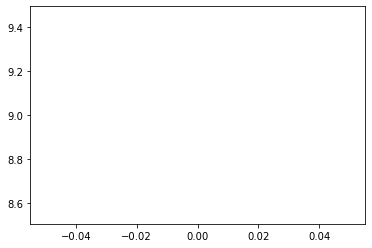

In [11]:

plt.plot(variation, color="red")
plt.show()


In [12]:
model.save("Incroyable")
del model
# Recreate the exact same model purely from the file:
model = keras.models.load_model("Incroyable")

INFO:tensorflow:Assets written to: Incroyable\assets
